I used the YOLOv8n (Nano) model—the smallest, "lightest" version in the family—to see if it could handle license plate localization. Even though it has a tiny fraction of the "brain power" (parameters) of the larger models, it’s nailing the plates with 80%+ confidence.

In [ ]:
# !pip install roboflow
# !pip install --upgrade roboflow
from google.colab import drive
drive.mount('/content/drive')
from roboflow import Roboflow
rf = Roboflow()
project = rf.workspace("roboflow-universe-projects").project("license-plate-recognition-rxg4e")
version = project.version(13)
dataset = version.download("yolov8")

In [2]:
from pathlib import Path

ROOT_FOLDER=Path("/content/License-Plate-Recognition-13")
TRAIN_FOLDER=ROOT_FOLDER/"train"
TRAIN_IMAGES=TRAIN_FOLDER/"images"
TRAIN_LABELES=TRAIN_FOLDER/"labels"
SAVE_DIR=ROOT_FOLDER/"models"
SAVE_DIR.mkdir(parents=True,exist_ok=True)

In [3]:
images_list=list(TRAIN_IMAGES.rglob("*.jpg"))
print(len(images_list))

98798


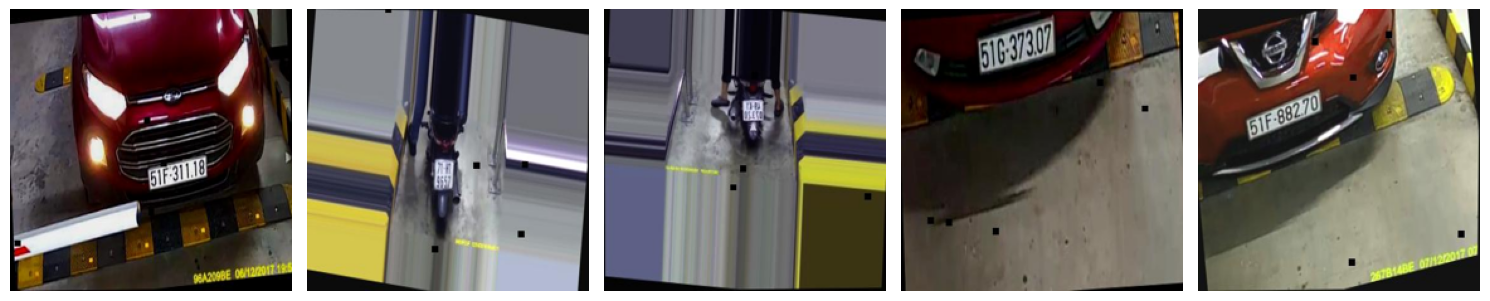

In [4]:
import matplotlib.pylab as plt
from PIL import Image
import random

fig,axes=plt.subplots(1,5,figsize=(15,6))

for img in range(5):
  image=random.choice(images_list)
  image=Image.open(image).convert("RGB").resize((224,224))

  axes[img].imshow(image)
  axes[img].axis('off')

plt.tight_layout()
plt.show()

In [5]:
labels_list=[label for label in TRAIN_LABELES.iterdir() if label.suffix.lower()==".txt"]
len(labels_list)

98798

In [6]:
for label in range(5):
  new_label=labels_list[label]
  with open(new_label,'r') as f:
    data=f.read().splitlines()
  print(data)
  print("*"*100)


['0 0.4781386514719848 0.6423076923076924 0.4094396961063628 0.17692307692307693']
****************************************************************************************************
['0 0.43473451327433627 0.3757088122605364 0.19690265486725664 0.29882503192848026']
****************************************************************************************************
['0 0.5114948281614948 0.5128586332811685 0.10647313980647312 0.13273343766301507']
****************************************************************************************************
['0 0.3740993265993266 0.7591673233517205 0.23060606060606068 0.22871027055424217']
****************************************************************************************************
['0 0.26608144941478273 0.6489864864864865 0.080295013628347 0.044844844844844814']
****************************************************************************************************


In [7]:
# !pip install ultralytics
from ultralytics import YOLO
import shutil

In [ ]:
model = YOLO("yolov8n.pt")

data_yaml = Path(dataset.location) / "data.yaml"

result = model.train(
    data = data_yaml,
    epochs = 5,
    imgsz = 640,
    batch = 16,
    workers = 2,
    device = 0  
)

TRAIN_DIR = Path("/content/runs/detect/train/weights")

best_model_path = TRAIN_DIR / "best.pt"
last_model_path = TRAIN_DIR / "last.pt"

shutil.copy(best_model_path, SAVE_DIR / "best.pt")
shutil.copy(last_model_path, SAVE_DIR / "last.pt")

print("Best and last models saved to:", SAVE_DIR)

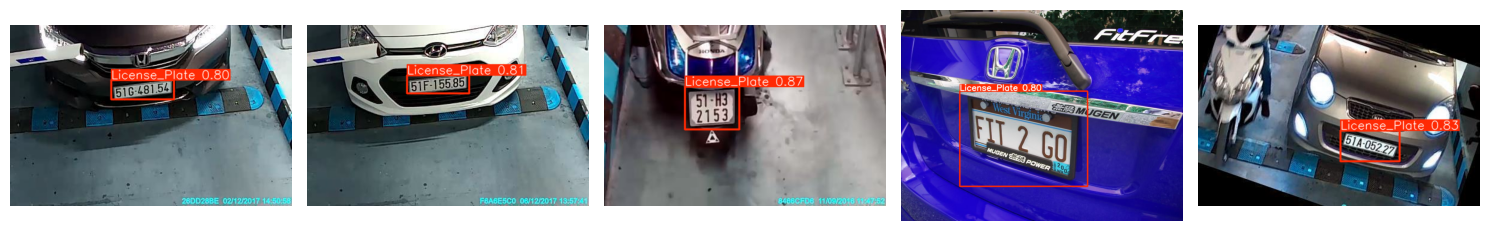

In [27]:
from IPython.display import display

model=YOLO("/content/License-Plate-Recognition-13/models/best.pt")

EVAL_FOLDER=ROOT_FOLDER/"valid"
EVAL_IMAGES=EVAL_FOLDER/"images"
EVAL_LABELES=TRAIN_FOLDER/"labels"

fig,axes=plt.subplots(1,5,figsize=(15,6))

eval_images=list(EVAL_IMAGES.rglob("*.jpg"))

for img in range(5):
  eval_path=random.choice(eval_images)
  image=Image.open(eval_path).resize((640,640))

  result=model.predict(eval_path,conf=0.5, verbose=False)
  annotated_image=result[0].plot()
  axes[img].imshow(annotated_image)
  axes[img].axis("off")
plt.tight_layout()
plt.show()

